# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
_ = PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, KRX


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


dict_keys(['UV_K200', 'UV_KRX', 'UV_LIQ', 'UV_WTR', 'UV_ETF', 'UV_FUND', 'UV_FCTR'])

In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'tickers': 'KRX/INDEX/STOCK/1028',
   'daily': True,
   'path': 'data'},
  'name': 'UV_K200'}}

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2021-01-04 to 2024-12-16 downloaded.
kospi200_prices_241216.csv saved
df_prices updated
Execution time of download: 29.61 secs


## KRX

In [14]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [69]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2021-01-04 to 2024-12-02 uploaded.
Price data loaded


In [70]:
wtr.get_names()

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500TR
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KOSEF 국고채10년
5) 284430: KODEX 200미국채혼합

In [71]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [72]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_weather_241213.csv saved
df_prices updated
Execution time of download: 0.85 secs


In [21]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [4]:
fund = PM.create_universe('UV_FUND')

65 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 65 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [5]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite=True
)
fund.download(**kw) if WidgetUniverse.values(0) else None

In [6]:
#fund.portfolio_data['universe']

In [7]:
df_fund = FundDownloader.export_master(fund)

Data for 65 funds loaded.


### Case: Cost

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

65 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 65 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241218.csv loaded


In [5]:
m = 'cagr'
#m = 'total_return'
kw = dict(metrics=['start','end', m], sort_by=m, adjust=False)

df = fund.performance(**kw).iloc[:3]
df

,name,start,end,cagr
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,2022-12-30,2024-11-29,0.150021
K55364CF7048,에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e,2019-04-30,2024-11-29,0.110833
K55303BT4176,마이다스아시아리더스성장주연금증권자투자신탁(UH)(주식)C-Pe2,2017-11-30,2024-11-29,0.093927


In [6]:
tickers = df.index
fund.performance(tickers, fee=fee, **kw)

,name,start,end,cagr
K55301DW1763,미래에셋전략배분TDF2035혼합자산자투자신탁종류O,2022-12-30,2024-11-29,0.150021
K55364CF7048,에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e,2019-04-30,2024-11-29,0.100327
K55303BT4176,마이다스아시아리더스성장주연금증권자투자신탁(UH)(주식)C-Pe2,2017-11-30,2024-11-29,0.084917


In [7]:
fee['K55301DW1763']

0.0

In [8]:
fee.loc[fee == 0]

ticker
K55301DW1763    0.0
K55101BY3944    0.0
KR5223AE3357    0.0
K55207BU0715    0.0
K55234CJ0997    0.0
Name: fee, dtype: float64

In [26]:
fund.get_date_range(tickers)

,name,start date,end date,n
K55364CF7048,에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e,2019-04-30,2024-11-29,2041
K55210CO3828,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-re),2019-04-30,2024-11-29,2041
K55234DF3317,IBK로우코스트TDF2055증권자투자신탁[혼합-재간접형]종류C-Re,2021-04-30,2024-11-29,1310


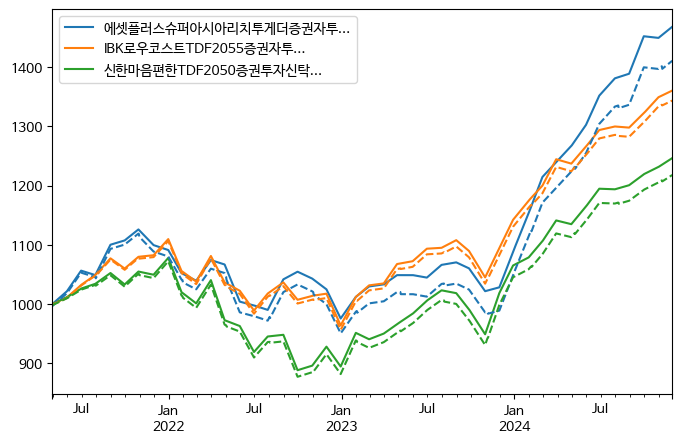

In [15]:
_ = fund.plot(tickers=tickers, adjust=True, fee=fee)

In [34]:
from pf_utils import get_date_range, performance_stats


def performance(self, tickers=None, metrics=None, adjust=False, 
                sort_by=None, start_date=None, end_date=None,
                fee=None, period_fee=3, percent_fee=True):

    df_prices = self._get_prices(tickers=tickers, adjust=adjust, n_max=-1)
    if df_prices is None:
        return None
    else:
        df_prices = df_prices.loc[start_date:end_date]

    if fee is not None:
        df_prices = self._get_prices_after_fee(df_prices, fee, 
                                               period=period_fee, percent=percent_fee)
    #return get_date_range(df_prices)
    return df_prices

#performance(fund, tickers, adjust=True)
#performance(fund, tickers, fee=fee)

In [30]:
performance(fund, tickers)

,start date,end date,n
K55364CF7048,2019-04-30,2024-11-29,2041
K55210CO3828,2019-04-30,2024-11-29,2041
K55234DF3317,2021-04-30,2024-11-29,1310


In [50]:
df_prices = performance(fund, tickers)
df_prices = performance(fund, tickers, fee=fee)
df_prices = performance(fund, tickers, adjust=True)
df_prices = performance(fund, tickers, fee=fee, adjust=True)
get_date_range(df_prices)

,start date,end date,n
K55364CF7048,2021-04-30,2024-11-29,1310
K55234DF3317,2021-04-30,2024-11-29,1310
K55210CO3828,2021-04-30,2024-11-29,1310


In [51]:
performance_stats(df_prices, metrics=None)

,K55364CF7048,K55234DF3317,K55210CO3828
start,2021-04-30,2021-04-30,2021-04-30
end,2024-11-29,2024-11-29,2024-11-29
rf,0.0,0.0,0.0
total_return,0.41566,0.344997,0.220255
cagr,0.101849,0.086218,0.057115
max_drawdown,-0.150496,-0.135459,-0.181777
calmar,0.676757,0.636491,0.314205
mtd,0.009873,0.007364,0.010513
three_month,0.055779,0.047607,0.037209
six_month,0.126229,0.074928,0.069431


## LIQ

In [84]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [85]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2021-01-04 to 2024-11-28 uploaded.
Price data loaded


In [86]:
#liq.get_names()

In [87]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.83it/s]

2.2 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2021-01-04 to 2024-12-13 downloaded.
krx_liq_prices_241213.csv saved
df_prices updated
Execution time of download: 3.03 secs


## Additional Data

### Cost

*Check missing cost data*

In [6]:
PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_241218.csv loaded
65 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 65 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [7]:
fd = FundDownloader.create(fund)
fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
#fd.export_cost('UV_FUND')

Data for 65 funds loaded.
Cost data transaction_cost_241218.csv loaded
ERROR: failed to save as the file exists


### Financial Ratio

In [48]:
WidgetUniverse

In [49]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-19 loaded


In [50]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [07:30<00:00,  2.25s/it]


7.5 mins elapsed, 16.0 secs paused (3.6%)
Financial ratios of 200 stocks from 2023-01-02 to 2024-12-13 downloaded
kospi200_ratios_241213.csv saved


In [51]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [52]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2024-12-13
Price: 2021-01-04 ~ 2024-12-13


# Performance

In [4]:
PM.review()

Portfolio: MMT, PER, WTR, LIQ, TDF, HANA, FCTR, KRX


In [5]:
pf_list = ['MMT', 'PER', 'WTR']
pm = PM(pf_list)

MMT:
200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded

PER:
200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded

WTR:
6 securities from 2021-01-04 to 2024-12-02 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded



In [20]:
#pm.load('LIQ')
pm.load(['TDF','HANA'])

TDF:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-06-19 loaded

HANA:
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



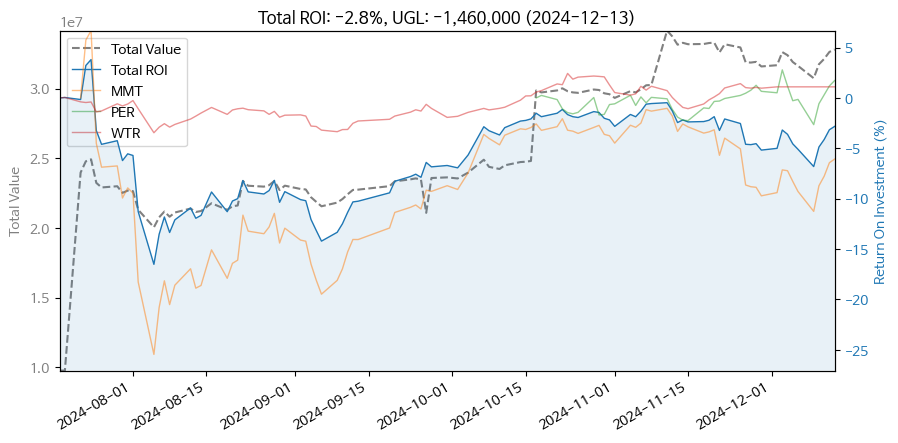

In [6]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date, roi=False)
pm.plot(start_date=start_date)

In [7]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [8]:
pm.valuate(date=w_date.value)

,MMT,PER,WTR,Total
start,2024-07-22,2024-10-17,2024-07-18,2024-07-18
date,2024-12-13,2024-12-13,2024-12-02,2024-12-13
buy,29349501,12249820,10049835,51649156
sell,14322250,2621865,437755,17381870
value,13245200,9839290,9722580,32807070
UGL,-1782051,211335,110500,-1460216
ROI,-0.060718,0.017252,0.010995,-0.028272


# Transaction

## MMT

In [4]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2021-01-04 to 2024-12-16 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-12-16 loaded


In [5]:
pf_mmt.update_record()

In [6]:
#pf_mmt.portfolio_data['strategy']

In [7]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2024-11-11 267260   HD현대일렉트릭   390000            0    8     0.2    0.212   
           012450  한화에어로스페이스   403500           -1    6     0.2    0.192   
           079550     LIG넥스원   266000            0   11     0.2    0.199   
           003230       삼양식품   563000           -1    5     0.2    0.191   
           064350       현대로템    63300           48   48     0.2    0.206   
           011790        SKC   122145          -19    0     NaN    0.000   
2024-12-16 267260   HD현대일렉트릭   389500           -1    7     0.2    0.222   
           010130       고려아연  1165000            2    2     0.2    0.190   
           003230       삼양식품   729000           -2    3     0.2    0.178   
           000150         두산   272500           10   10     0.2    0.222   
           298040      효성중공업   457999            5    5     0.2    0.187   
           012450  한화에어로스페이스   307499           -7    0     0.0    0.000   
           064350       현대로템    48250          -47    0     0.0    0.000   
           079550     LIG넥스원   193700          -11    0     0.0    0.000   

                       date*  
date       ticker             
2024-11-11 267260 2024-11-11  
           012450 2024-11-11  
           079550 2024-11-11  
           003230 2024-11-11  
           064350 2024-11-11  
           011790 2024-11-11  
2024-12-16 267260 2024-12-17  
           010130 2024-12-17  
           003230 2024-12-17  
           000150 2024-12-17  
           298040 2024-12-17  
           012450 2024-12-17  
           064350 2024-12-17  
           079550 2024-12-17

In [8]:
# run after editting record file
#pf_mmt.update_record(save=True)

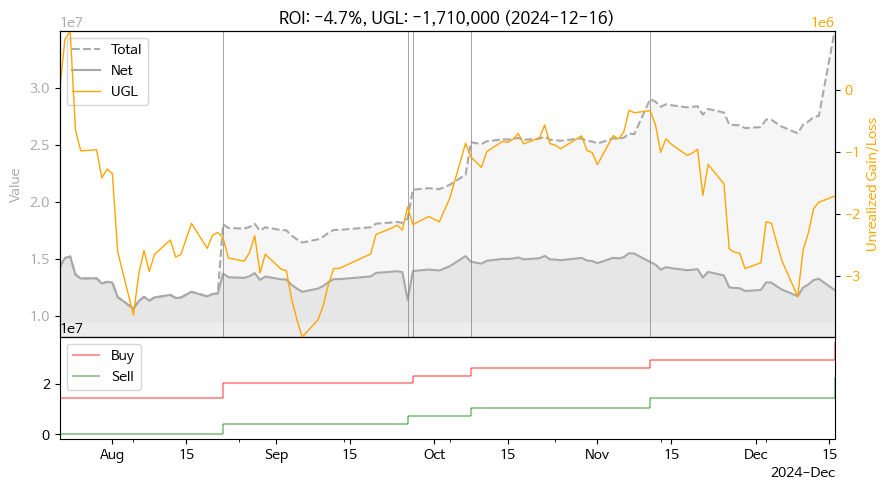

In [8]:
pf_mmt.plot(roi=False)

In [18]:
#pf_mmt.performance(metrics=METRICS)
#pf_mmt.cost
res = pf_mmt.valuate('2024-11-11')
','.join([str(x) for x in res.to_list()])

'2024-07-22,2024-11-11,29350569,14295948,14723900,-330721,-0.011267958723389655'

In [9]:
data = [1,2,3]
print(','.join([str(x) for x in data]))

1,2,3


In [7]:
pf_mmt.valuate(print_result=False)

start    2024-07-22
date     2024-12-16
buy        36695836
sell       22727138
value      12258500
UGL        -1710198
ROI       -0.046605
dtype: object

In [16]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)

Liquidation set to None
5 tickers selected by Total return from 2023-12-11 to 2024-12-09
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 8 %
ROI: -4.5%, UGL: -1,628,000  (2024-12-16)
All transactions saved to pf_k200_momentum_241216.csv


In [18]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2024-11-11 267260   HD현대일렉트릭   390000            0    8     0.2    0.212   
           012450  한화에어로스페이스   403500           -1    6     0.2    0.192   
           079550     LIG넥스원   266000            0   11     0.2    0.199   
           003230       삼양식품   563000           -1    5     0.2    0.191   
           064350       현대로템    63300           48   48     0.2    0.206   
           011790        SKC   122145          -19    0     NaN    0.000   
2024-12-16 267260   HD현대일렉트릭   380000           -1    7     0.2    0.221   
           010130       고려아연  1166000            2    2     0.2    0.193   
           003230       삼양식품   729000           -2    3     0.2    0.181   
           000150         두산   262500           10   10     0.2    0.218   
           298040      효성중공업   451500            5    5     0.2    0.187   
           012450  한화에어로스페이스   320000           -7    0     0.0    0.000   
           064350       현대로템    49550          -48    0     0.0    0.000   
           079550     LIG넥스원   194500          -11    0     0.0    0.000   

                       date*  
date       ticker             
2024-11-11 267260 2024-11-11  
           012450 2024-11-11  
           079550 2024-11-11  
           003230 2024-11-11  
           064350 2024-11-11  
           011790 2024-11-11  
2024-12-16 267260 2024-12-16  
           010130 2024-12-16  
           003230 2024-12-16  
           000150 2024-12-16  
           298040 2024-12-16  
           012450 2024-12-16  
           064350 2024-12-16  
           079550 2024-12-16

In [26]:
pf_mmt.view_record(-1)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2024-12-16 267260   HD현대일렉트릭  0.975610      -389500  2726500     0.2    0.222   
           010130       고려아연  1.000858      2330000  2330000     0.2    0.190   
           003230       삼양식품  1.000000     -1458000  2187000     0.2    0.178   
           000150         두산  0.963303      2725000  2725000     0.2    0.222   
           298040      효성중공업  0.985808      2290000  2290000     0.2    0.187   
           012450  한화에어로스페이스  1.040650     -2152501        0     0.0    0.000   
           064350       현대로템  1.026943     -2316000        0     0.0    0.000   
           079550     LIG넥스원  1.004130     -2130700        0     0.0    0.000   

                       date*  
date       ticker             
2024-12-16 267260 2024-12-17  
           010130 2024-12-17  
           003230 2024-12-17  
           000150 2024-12-17  
           298040 2024-12-17  
           012450 2024-12-17  
           064350 2024-12-17  
           079550 2024-12-17

## KRX
*simulation*

In [36]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [20]:
pf_krx.view_record(-2)

No transaction record imported


In [21]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [26]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2024-12-13 loaded


In [28]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-11-11 loaded


In [29]:
#pf_per.portfolio_data

In [30]:
pf_per.view_record(-2)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                             
2024-10-17 010060   OCI홀딩스  0.992504       933800   933800    0.20    0.189   
           003030   세아제강지주  0.995439       986700   986700    0.20    0.200   
           009970  영원무역홀딩스  1.006742       979000   979000    0.20    0.198   
           016380     KG스틸  0.986364      1016400  1016400    0.20    0.206   
           047040     대우건설  1.000000      1019940  1019940    0.20    0.207   
2024-11-11 010060   OCI홀딩스  1.006689      -358800   478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200   386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200   428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020   500840    0.05    0.052   
           047040     대우건설  0.993122      -461645   508900    0.05    0.053   
           088350     한화생명  1.001745       515700   515700    0.05    0.054   
           078930       GS  1.002404       499200   499200    0.05    0.052   
           111770     영원무역  0.996264       481800   481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750   519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600   427600    0.05    0.044   
           001450     현대해상  1.000000       505750   505750    0.05    0.053   
           009900     명신산업  1.008715       495720   495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000   520000    0.05    0.054   
           000270       기아  1.010684       468000   468000    0.05    0.049   
           024110     기업은행  1.002059       509950   509950    0.05    0.053   
           005850      에스엘  1.014354       501600   501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560   514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650   518650    0.05    0.054   
           005380      현대차  1.007160       419000   419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700   416700    0.05    0.043   

                       date*  
date       ticker             
2024-10-17 010060 2024-10-17  
           003030 2024-10-17  
           009970 2024-10-17  
           016380 2024-10-17  
           047040 2024-10-17  
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [31]:
pf_per.valuate()

start    2024-10-17
date     2024-12-13
buy        12250265
sell        2617050
value       9839290
UGL          206075
ROI        0.016822
dtype: object

In [32]:
#pf_per.update_record()
#pf_per.view_record(-2)

Tickers 009900, 016380 added to universe


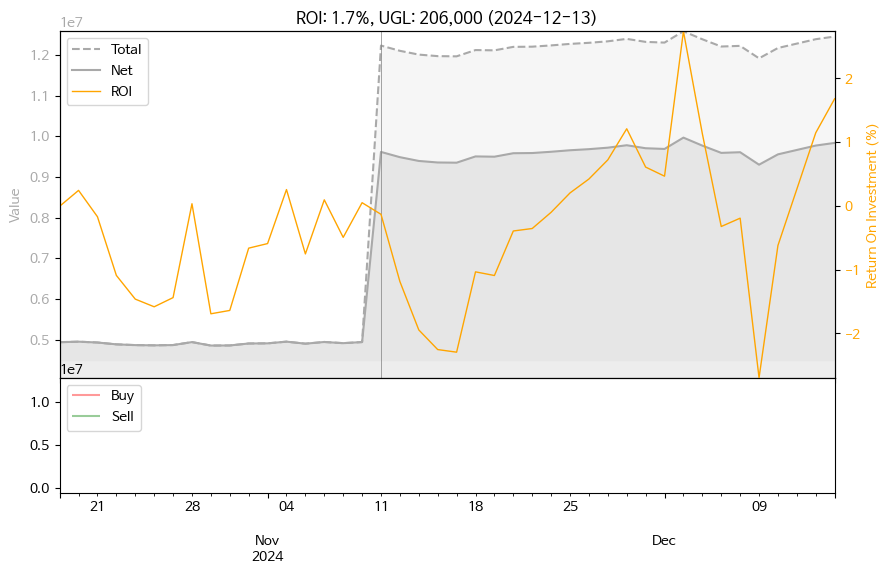

In [33]:
pf_per.plot()

In [34]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

ERROR: KeyError "['016380', '009900'] not in index"


In [35]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [36]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
20 tickers selected by Financial Ratio from 2024-10-14 to 2024-12-13
Weights of tickers determined by Equal weights.
New cash inflows of 5,000,000
Mean absolute error of weights: 3 %
Tickers 009900, 016380 added to universe
Tickers 009900, 016380 added to universe
ROI: -6.8%, UGL: -1,319,000  (2024-12-13)
Set save=True to save transaction record


name  ratio  transaction     net  weight  weight*  \
date       ticker                                                         
2024-12-13 010060   OCI홀딩스    1.0       190800  699600    0.05    0.049   
           003030   세아제강지주    1.0       367200  734400    0.05    0.051   
           009970  영원무역홀딩스    1.0       258600  689600    0.05    0.048   
           047040     대우건설    1.0       262955  741055    0.05    0.052   
           088350     한화생명    1.0       269860  741460    0.05    0.052   
           078930       GS    1.0       243300  729900    0.05    0.051   
           111770     영원무역    1.0       218000  741200    0.05    0.052   
           005830   DB손해보험    1.0       217400  652200    0.05    0.045   
           001450     현대해상    1.0       267000  720900    0.05    0.050   
           139130  DGB금융지주    1.0       184590  738360    0.05    0.051   
           000270       기아    1.0       196200  686700    0.05    0.048   
           241560     두산밥캣    1.0       171600  729300    0.05    0.051   
           005850      에스엘    1.0       221550  727950    0.05    0.051   
           024110     기업은행    1.0       220500  735000    0.05    0.051   
           005380      현대차    1.0       215000  645000    0.05    0.045   
           028050    삼성E&A    1.0       741720  741720    0.05    0.052   
           383220      F&F    1.0       702000  702000    0.05    0.049   
           316140   우리금융지주    1.0       222460  730940    0.05    0.051   
           105630     한세실업    1.0       741030  741030    0.05    0.052   
           138930  BNK금융지주    1.0       132480  739680    0.05    0.051   
           009900      NaN    1.0      -500040       0    0.00    0.000   
           016380      NaN    1.0      1021811       0    0.00    0.000   
           017800   현대엘리베이    1.0      -513900       0    0.00    0.000   

                       date*  
date       ticker             
2024-12-13 010060 2024-12-13  
           003030 2024-12-13  
           009970 2024-12-13  
           047040 2024-12-13  
           088350 2024-12-13  
           078930 2024-12-13  
           111770 2024-12-13  
           005830 2024-12-13  
           001450 2024-12-13  
           139130 2024-12-13  
           000270 2024-12-13  
           241560 2024-12-13  
           005850 2024-12-13  
           024110 2024-12-13  
           005380 2024-12-13  
           028050 2024-12-13  
           383220 2024-12-13  
           316140 2024-12-13  
           105630 2024-12-13  
           138930 2024-12-13  
           009900 2024-12-13  
           016380 2024-12-13  
           017800 2024-12-13

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [13]:
#pf_wtr = PM.create_portfolio('WTR_2407', **kw_cost)
pf_wtr = PM.create_portfolio('WTR_2412', **kw_cost)

6 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-12-13 loaded


In [15]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

Transaction file pf_wtr2412_static_241213.csv updated
self.record updated


In [16]:
pf_wtr.plot()

ERROR: need more data to plot


In [17]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-13 069500             KODEX 200   33120           25   25  0.1667   
           379800      KODEX 미국S&P500TR   19820           42   42  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117380            7    7  0.1667   
           411060            ACE KRX금현물   17660           47   47  0.1667   
           148070          KOSEF 국고채10년  119410            6    6  0.1667   
           284430        KODEX 200미국채혼합   12890           64   64  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-13 069500    0.171 2024-12-13  
           379800    0.172 2024-12-13  
           273130    0.169 2024-12-13  
           411060    0.171 2024-12-13  
           148070    0.148 2024-12-13  
           284430    0.170 2024-12-13

In [8]:
#pf_wtr.performance(metrics=METRICS)

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [12]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

Liquidation set to None
6 tickers selected by All from 2024-12-13 to 2024-12-13
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
ROI: -0.0%, UGL: -204  (2024-12-13)
All transactions saved to pf_wtr2412_static_241213.csv


name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-13 069500             KODEX 200   33120           25   25  0.1667   
           379800      KODEX 미국S&P500TR   19820           42   42  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117380            7    7  0.1667   
           411060            ACE KRX금현물   17660           47   47  0.1667   
           148070          KOSEF 국고채10년  119410            6    6  0.1667   
           284430        KODEX 200미국채혼합   12890           64   64  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-13 069500    0.171 2024-12-13  
           379800    0.172 2024-12-13  
           273130    0.169 2024-12-13  
           411060    0.171 2024-12-13  
           148070    0.148 2024-12-13  
           284430    0.170 2024-12-13

In [11]:
pf_wtr.valuate()

start    2024-12-13
date     2024-12-13
buy         4853744
sell              0
value       4853540
UGL            -204
ROI       -0.000042
dtype: object

## LIQ

In [37]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-01-03 loaded


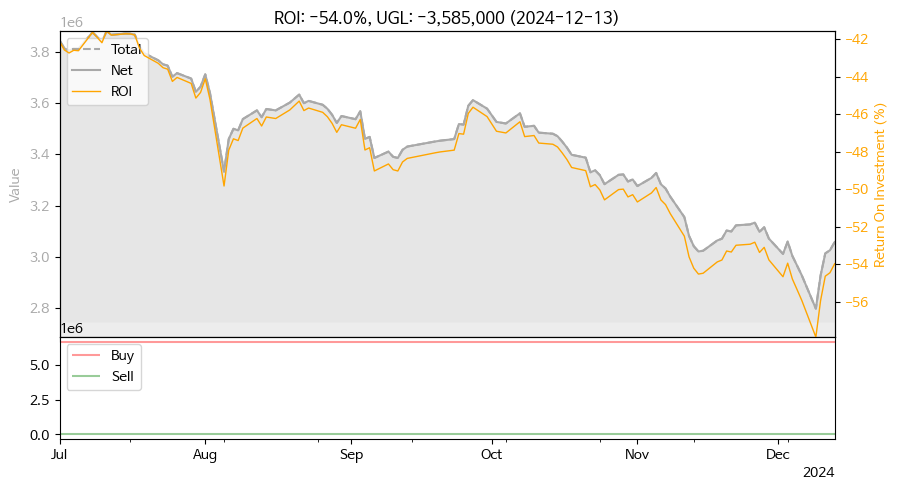

In [89]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [90]:
pf_liq.view_record()

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-01-03 011780     금호석유  0.750877       342000  342000     NaN    0.051   
           066570     LG전자  0.812245       245000  245000     NaN    0.037   
           035890     서희건설  0.760000       298800  298800     NaN    0.045   
           040420  정상제이엘에스  0.875784       294890  294890     NaN    0.044   
           140520     대창스틸  0.803077       292500  292500     NaN    0.044   
           072990    에이치시티  0.542767       286200  286200     NaN    0.043   
           091580    상신이디피  0.918452       302400  302400     NaN    0.046   
           011200      HMM  0.755977       289850  289850     NaN    0.044   
           002220     한일철강  0.768371       297350  297350     NaN    0.045   
           006650     대한유화  0.832507       181500  181500     NaN    0.027   
           136490       선진  0.524409       292100  292100     NaN    0.044   
           064550    바이오니아  0.707956       297900  297900     NaN    0.045   
           460860     동국제강  0.599797       149784  149784     NaN    0.023   
           040910     아이씨디  0.741803       292800  292800     NaN    0.044   
           024950   삼천리자전거  0.675537       293100  293100     NaN    0.044   
           900070   글로벌에스엠  0.516667       299160  299160     NaN    0.045   
           036580      팜스코  0.523810       298410  298410     NaN    0.045   
           184230  SGA솔루션즈  0.589354       299820  299820     NaN    0.045   
           460850     동국씨엠  0.383273        90275   90275     NaN    0.014   
           016250  SGC E&C  0.409565       276000  276000     NaN    0.042   
           001230    동국홀딩스  0.354766        48088   48088     NaN    0.007   
           049470      SGA  0.528251       299935  299935     NaN    0.045   
           217820    원익피앤이  0.485701       275396  275396     NaN    0.041   
           109960   AP헬스케어  0.218206       598820  598820     NaN    0.090   

                       date*  
date       ticker             
2024-01-03 011780 2024-01-03  
           066570 2024-01-03  
           035890 2024-01-03  
           040420 2024-01-03  
           140520 2024-01-03  
           072990 2024-01-03  
           091580 2024-01-03  
           011200 2024-01-03  
           002220 2024-01-03  
           006650 2024-01-03  
           136490 2024-01-03  
           064550 2024-01-03  
           460860 2024-01-03  
           040910 2024-01-03  
           024950 2024-01-03  
           900070 2024-01-03  
           036580 2024-01-03  
           184230 2024-01-03  
           460850 2024-01-03  
           016250 2024-01-03  
           001230 2024-01-03  
           049470 2024-01-03  
           217820 2024-01-03  
           109960 2024-01-03

## TDF

In [38]:
selected = ['K55301BU6139', 'K55206C95800']

In [40]:
pf_tdf = PM.create_portfolio('TDF_2406', tickers=selected, cost=file_cost)
pf_tdf.view_record()

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-06-19 loaded


name  ratio  \
date       ticker                                                           
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000     0.5      0.5 2024-06-19  
           K55206C95800      5000000  5000000     0.5      0.5 2024-06-19

In [41]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

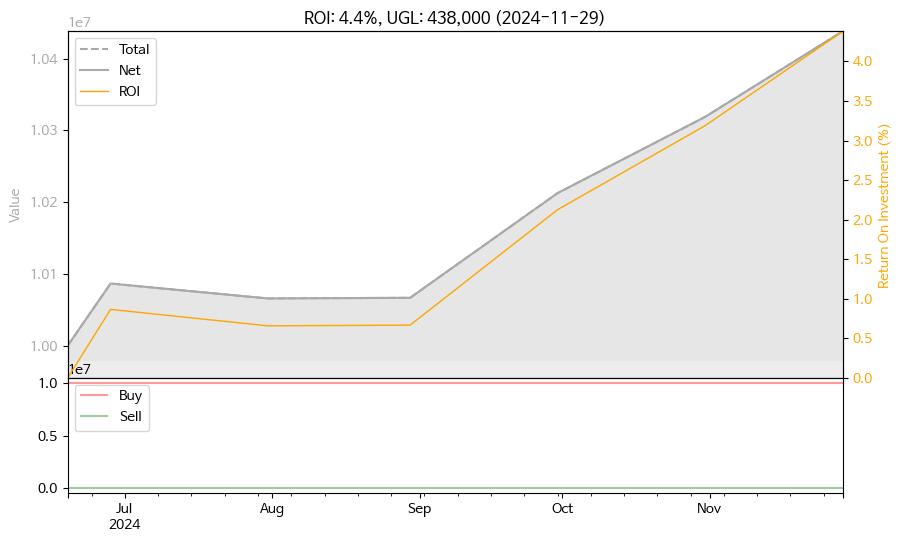

In [42]:
pf_tdf.plot()

In [43]:
pf_tdf.valuate()

start    2024-06-19
date     2024-11-29
buy        10000000
sell              0
value      10438108
UGL          438108
ROI        0.043811
dtype: object

In [44]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [45]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record()

Liquidation set to None
2 tickers selected by Selected from 2024-11-29 to 2024-11-29
Weights of tickers determined by Equal weights.
New cash inflows of 5,000,000
Mean absolute error of weights: 0 %
ROI: 2.8%, UGL: 414,000  (2024-11-29)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                           
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2024-11-29 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000     0.5      0.5 2024-06-19  
           K55206C95800      5000000  5000000     0.5      0.5 2024-06-19  
2024-11-29 K55301BU6139      2551143  7718000     0.5      0.5 2024-11-29  
           K55206C95800      2447367  7718617     0.5      0.5 2024-11-29

## HANA

In [11]:
selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']

In [12]:
df_fund.loc[df.index.isin(selected)]

,name,buy,sell,fee,tax,check1_date,check1_price,check2_date,check2_price
ticker,,,,,,,,,
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),NaN,NaN,0.33,NaN,2023-11-30,1018.53,2024-10-31,1080.77
KR5236AS4826,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E,NaN,NaN,0.87,NaN,2023-04-28,1151.25,2024-03-29,1252.51
KR5370AP9956,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce,NaN,NaN,0.67,NaN,2023-01-31,1166.97,2023-12-29,1245.58
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,NaN,NaN,0.96,NaN,2023-09-27,971.57,2024-08-30,1139.63


In [5]:
pf_hana = PM.create_portfolio('HANA_2408', tickers=selected, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [49]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

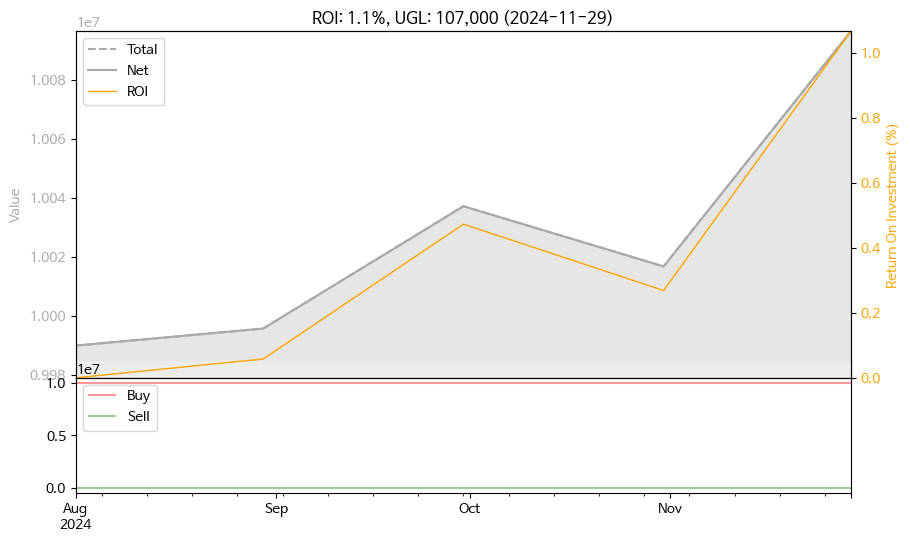

In [50]:
pf_hana.plot()

In [51]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 tickers selected by Selected from 2022-11-29 to 2024-11-29
Weights of tickers determined by Inv.Vol.
New cash inflows of 5,000,000
Mean absolute error of weights: 0 %
ROI: 0.6%, UGL: 88,000  (2024-11-29)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
2024-11-29 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
           K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
2024-11-29 KR5101888398      3383285  8503829  0.5633    0.563 2024-11-29  
           KR5236AS4826       835773  3226604  0.2138    0.214 2024-11-29  
           KR5370AP9956       447243  2355309  0.1561    0.156 2024-11-29  
           K55306CV9946       330213  1007446  0.0668    0.067 2024-11-29